In [119]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st

result = 'snapshot_test1_faults'

In [120]:
def extract_scenario_data(name):
    with open(name) as f:
        scenario = json.load(f)

    faults = {}
    transactions = []
    network = {}
    nodes = scenario['set_up']['num_nodes']

    for interval in scenario['intervals'].values():
        dur = interval['end'] - interval['start'] 
        for key, value in interval.items():
            if key == 'faults':
                for fault in value:
                    faults[fault[0]] = faults.get(fault[0], []) + [(fault[1:])]
            if key == 'transactions':
                transactions += value
            if key == 'network':
                for net in value:
                    network[net[0]] = network.get(net[0], []) + [net[1]]

    dur = 30
    intervals = np.arange(0, scenario['set_up']['duration'], dur)
    tps = []

    counter = 0
    for end in intervals[1:]:
        itx = 0
        while transactions[counter][2] < end:
            itx += 1
            counter += 1
        
        tps.append(itx/dur)

    return nodes, scenario['set_up']['duration'], tps, network, faults

In [121]:
def plot_throughput(ax, result, label, fontsize, add_WL=None):
    with open(f'Results/{result}.json') as f:
        res = json.load(f)

    tps_per_node = {}
    metric = 'throughput'
    for interval in res.values():
        for i, value in enumerate(interval['metrics'][metric].values()):
            tps_per_node[i] = tps_per_node.get(i, []) + [value]

    data = np.array(list(tps_per_node.values()))

    mean_data = np.mean(data.T, axis=1)
    mean_data = data[2]

    ax.plot(mean_data, '--', label=label,  markersize=3, zorder=4, linewidth=1)
    
    if add_WL is not None:
        ax.plot(add_WL, '--r', markersize=3, label='Workload', linewidth=1)

    ax.grid(alpha=.5)

    ax.set_ylabel('TPS',fontsize=fontsize)
    ax.set_xlabel('Snapshot',fontsize=fontsize)
    ax.legend(fontsize=fontsize_small, ncol=3, loc='upper left')

In [101]:
def plot_gini(ax, result, label, fontsize):
    with open(f'Results/{result}.json') as f:
        data = json.load(f)

    tps_per_node = {}
    metric = 'decentralisation'
    for interval in data.values():
        for i, value in enumerate(interval['metrics'][metric].values()):
            tps_per_node[i] = tps_per_node.get(i, []) + [value]

    data = np.array(list(tps_per_node.values()))

    ax.plot(np.mean(data, axis=0), '-', markersize=3, linewidth=1, label=label)

    ax.set_ylabel('Decentralisation',fontsize=fontsize)
    ax.set_xlabel('Snapshot',fontsize=fontsize)
    ax.legend(fontsize=fontsize_small, ncol=3, loc='upper left')
    ax.grid(alpha=.5)

In [122]:
def plot_latency(ax, result, label, fontsize):
    with open(f'Results/{result}.json') as f:
        data = json.load(f)

    tps_per_node = {}
    metric = 'latency'
    for interval in data.values():
        for i, value in enumerate(interval['metrics'][metric].values()):
            tps_per_node[i] = tps_per_node.get(i, []) + [value['AVG']]

    data = np.array(list(tps_per_node.values()))

    mean_data = np.mean(data.T, axis=1)

    ax.plot(mean_data, '--', label=label, markersize=3, linewidth=1)

    ax.grid(alpha=.5)
    ax.legend(fontsize=fontsize_small, ncol=3, loc='upper left')
    ax.set_ylabel('Transaction Latency (S)', fontsize=fontsize)
    ax.set_xlabel('Snapshot', fontsize=fontsize)

In [123]:
scenario = 'test'
nodes, duration, tps, network, faults = extract_scenario_data(f'Scenarios/{scenario}.json')

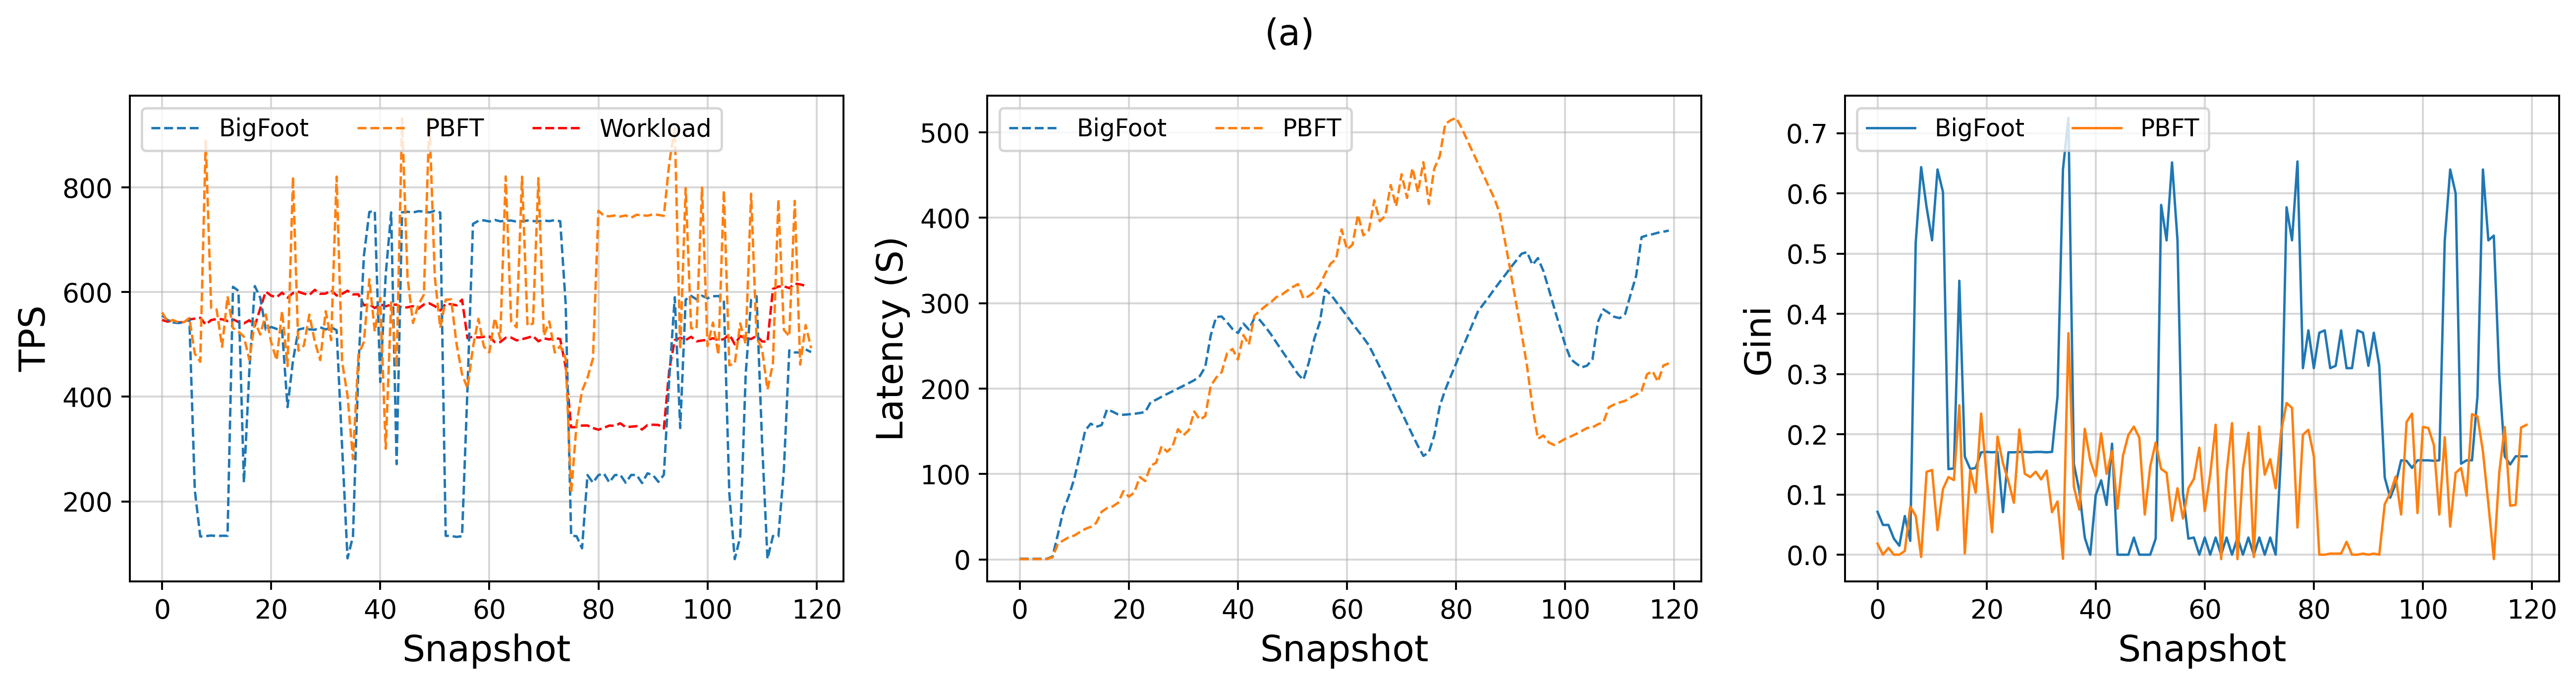

In [135]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(4)
fig.set_dpi(350)

fontsize = 15
fontsize_small = 10
matplotlib.rcParams['font.size'] = 11

result = f'{scenario}_faults_BF'
plot_throughput(axes[0], result, 'BigFoot', fontsize, add_WL=None)
plot_latency(axes[1], result, 'BigFoot', fontsize)
plot_gini(axes[2], result, 'BigFoot', fontsize)

result = f'{scenario}_faults_PBFT'
plot_throughput(axes[0], result, 'PBFT', fontsize, add_WL=tps)
plot_latency(axes[1], result, 'PBFT', fontsize)
plot_gini(axes[2], result, 'PBFT', fontsize)

name = f'result_{scenario}_faults'

plt.suptitle('(a)', fontsize=fontsize)
plt.tight_layout()
fig.savefig(f'{name}.pdf',format='pdf', dpi=300)

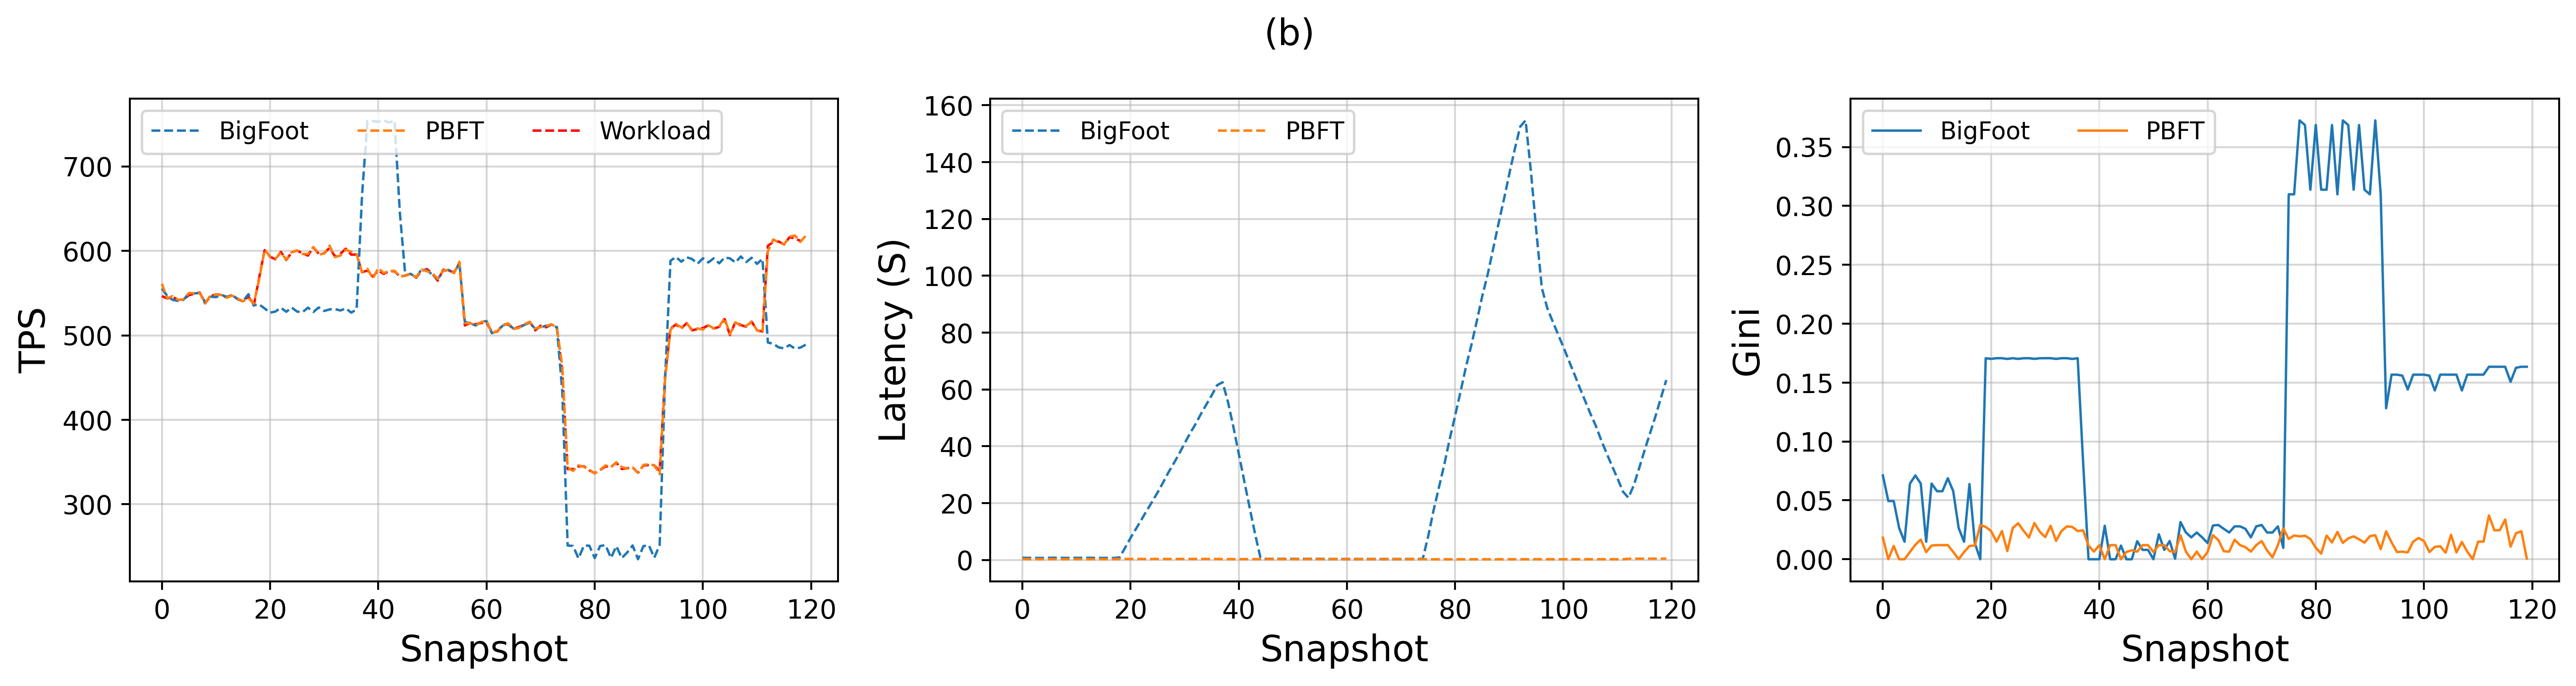

In [137]:
fig, axes = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(4)
fig.set_dpi(350)

fontsize = 15
fontsize_small = 10
matplotlib.rcParams['font.size'] = 11

result = f'{scenario}_no_faults_BF'
plot_throughput(axes[0], result, 'BigFoot', fontsize, add_WL=None)
plot_latency(axes[1], result, 'BigFoot', fontsize)
plot_gini(axes[2], result, 'BigFoot', fontsize)

result = f'{scenario}_no_faults_PBFT'
plot_throughput(axes[0], result, 'PBFT', fontsize, add_WL=tps)
plot_latency(axes[1], result, 'PBFT', fontsize)
plot_gini(axes[2], result, 'PBFT', fontsize)

name = f'result_{scenario}_no_faults'

plt.suptitle('(b)', fontsize=fontsize)
plt.tight_layout()
fig.savefig(f'{name}.pdf',format='pdf', dpi=300)

In [ ]:
def get_data(name):
    path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/overhead_scenario_{name}_faults.json'
    with open(path,'r') as f:
        data = json.load(f)

    switch_faults, normal_faults = [], []
    for d in data.values():
        s, n = d.values()
        switch_faults.append(s)
        normal_faults.append(n)

    try:
        path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/overhead_scenario_{name}_no_faults.json'
        with open(path,'r') as f:
            data = json.load(f)

        switch_no_faults, normal_no_faults = [], []
        for d in data.values():
            s, n = d.values()
            switch_no_faults.append(s)
            normal_no_faults.append(n)
    except:
        switch_no_faults, normal_no_faults = [], []

    return switch_faults, normal_faults, switch_no_faults, normal_no_faults

In [ ]:
scenario = 'test1'
switch_faults, normal_faults, switch_no_faults, normal_no_faults = get_data(scenario)

nodes, duration, tps, network, faults = extract_scenario_data(f'Scenarios/{scenario}.json')

In [ ]:
faulty_nodes = list(faults.keys())

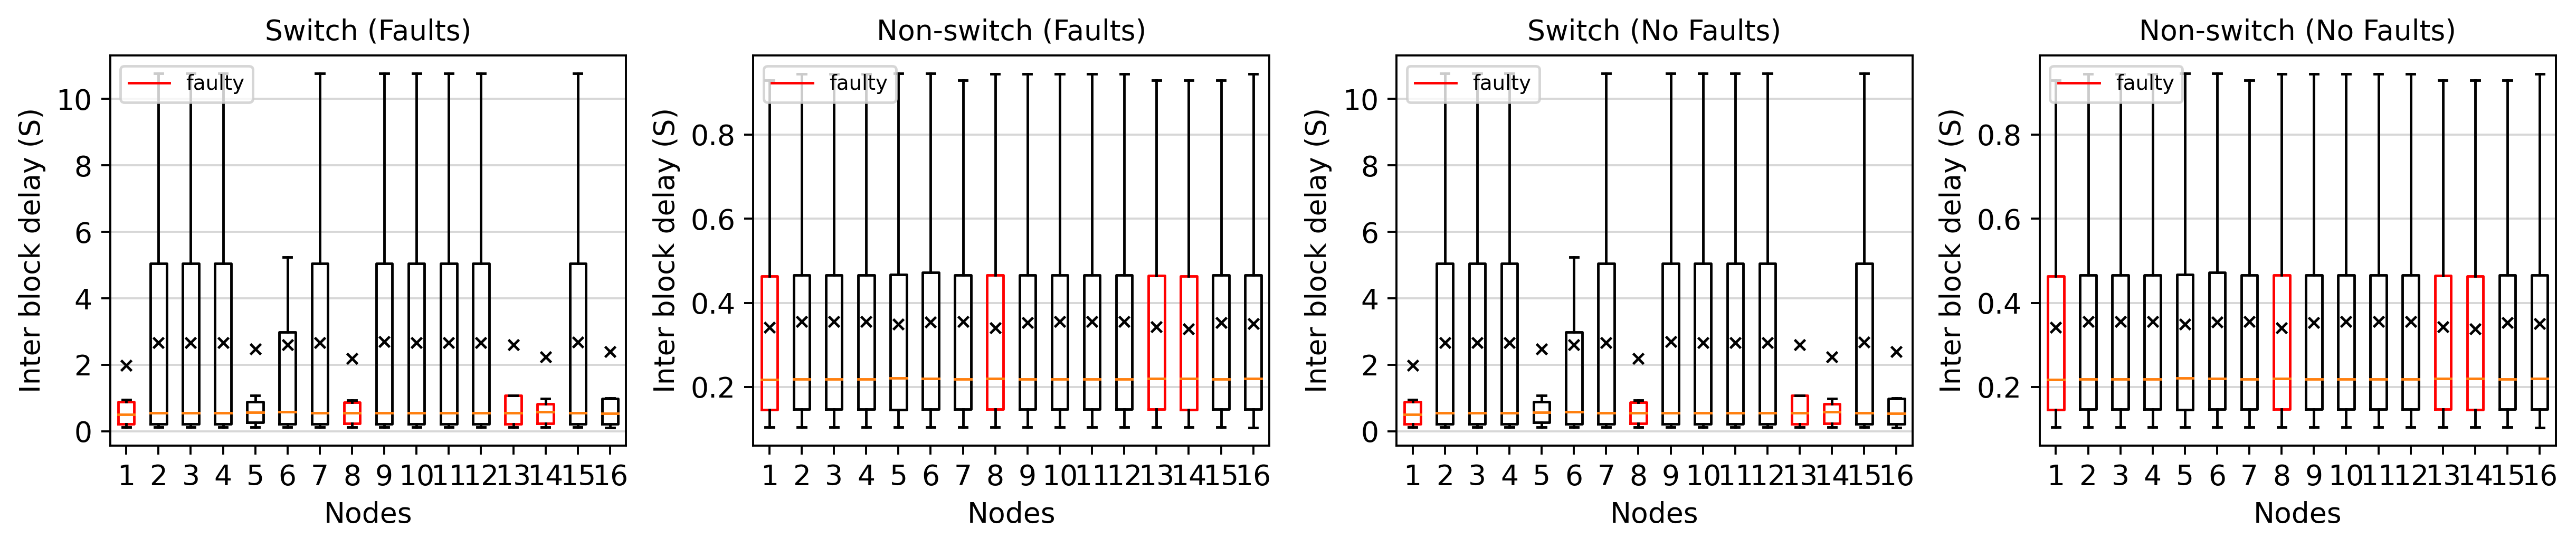

In [ ]:
fig, axes = plt.subplots(1,4)

fig.set_figwidth(14)
fig.set_figheight(3)
fig.set_dpi(350)

fontsize = 11
matplotlib.rcParams['font.size'] = 8

ax = axes[0]

def plot_data(ax, data, x_label, y_label, title):
    meanprops = {'marker':'x', 'markeredgecolor':'black', 'markersize':4}
    plot = ax.boxplot(data, showfliers=False, showmeans=True, meanprops=meanprops)
    for node in faulty_nodes:
        plot['boxes'][node].set_color('red')
    plot['boxes'][node].set_label('faulty')
    
    # plot = ax.bar(range(len(data)), [st.mean(x) for x in data])
    # err = [st.stdev(x) for x in data]
    # ax.errorbar(range(len(data)), [st.mean(x) for x in data], yerr=err, fmt='o', c='black', markersize=3, capsize=2)

    # for node in faulty_nodes:
    #     plot[node].set_color('red')
    # plot[node].set_label('faulty')

    ax.grid(alpha=.5, axis='y')

    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

    ax.legend(loc='upper left')

plot_data(axes[0], switch_faults, "Nodes", "Inter block delay (S)", 'Switch (Faults)')
plot_data(axes[1], normal_faults, "Nodes", "Inter block delay (S)", 'Non-switch (Faults)')
plot_data(axes[2], switch_no_faults, "Nodes", "Inter block delay (S)", 'Switch (No Faults)')
plot_data(axes[3], normal_no_faults, "Nodes", "Inter block delay (S)", 'Non-switch (No Faults)')


plt.tight_layout()

In [ ]:
def get_data(extra):
    path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/overhead_static_faults{extra}.json'
    with open(path,'r') as f:
        data = json.load(f)

    switch_faults, normal_faults = [], []
    for key, d in data.items():
        if key != 'dead':
            s, n = d.values()
            switch_faults.append(s)
            normal_faults.append(n)

    try:
        path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/overhead_static_no_faults{extra}.json'
        with open(path,'r') as f:
            data = json.load(f)

        switch_no_faults, normal_no_faults = [], []
        for key, d in data.items():
            if key != 'dead':
                s, n = d.values()
                switch_no_faults.append(s)
                normal_no_faults.append(n)
    except:
        switch_no_faults, normal_no_faults = [], []

    return switch_faults, normal_faults, switch_no_faults, normal_no_faults

In [ ]:
extra = 'net_div'
switch_faults, normal_faults, switch_no_faults, normal_no_faults = get_data(extra)

for node, data in enumerate(normal_faults):
    for val in data:
        if val <= 0:
            print(node, 'problem', val)

[1.201942551442017, 0, 1.201067850728619, 1.397762301858588, 1.201942551442017, 1.4374753905048177, 1.487623113752807]
[0.6858053263048064, 0, 0.6800859953508633, 0.6817889453640031, 0.6848784435087245, 0.6486329809594259, 0.6253536795939414]
[0.0013376498715322249, 0.050145901900032125, 0.0263585073473617, 0.0013376498715322249, 0.0013376498715322249, 0.004849307065461239, 0.0013376498715322249]
[0.023451907482500377, 0.021939861838442893, 0.021963902733539445, 0.023451907482500377, 0.023451907482500377, 0.021963901711725995, 0.023451907482500377]


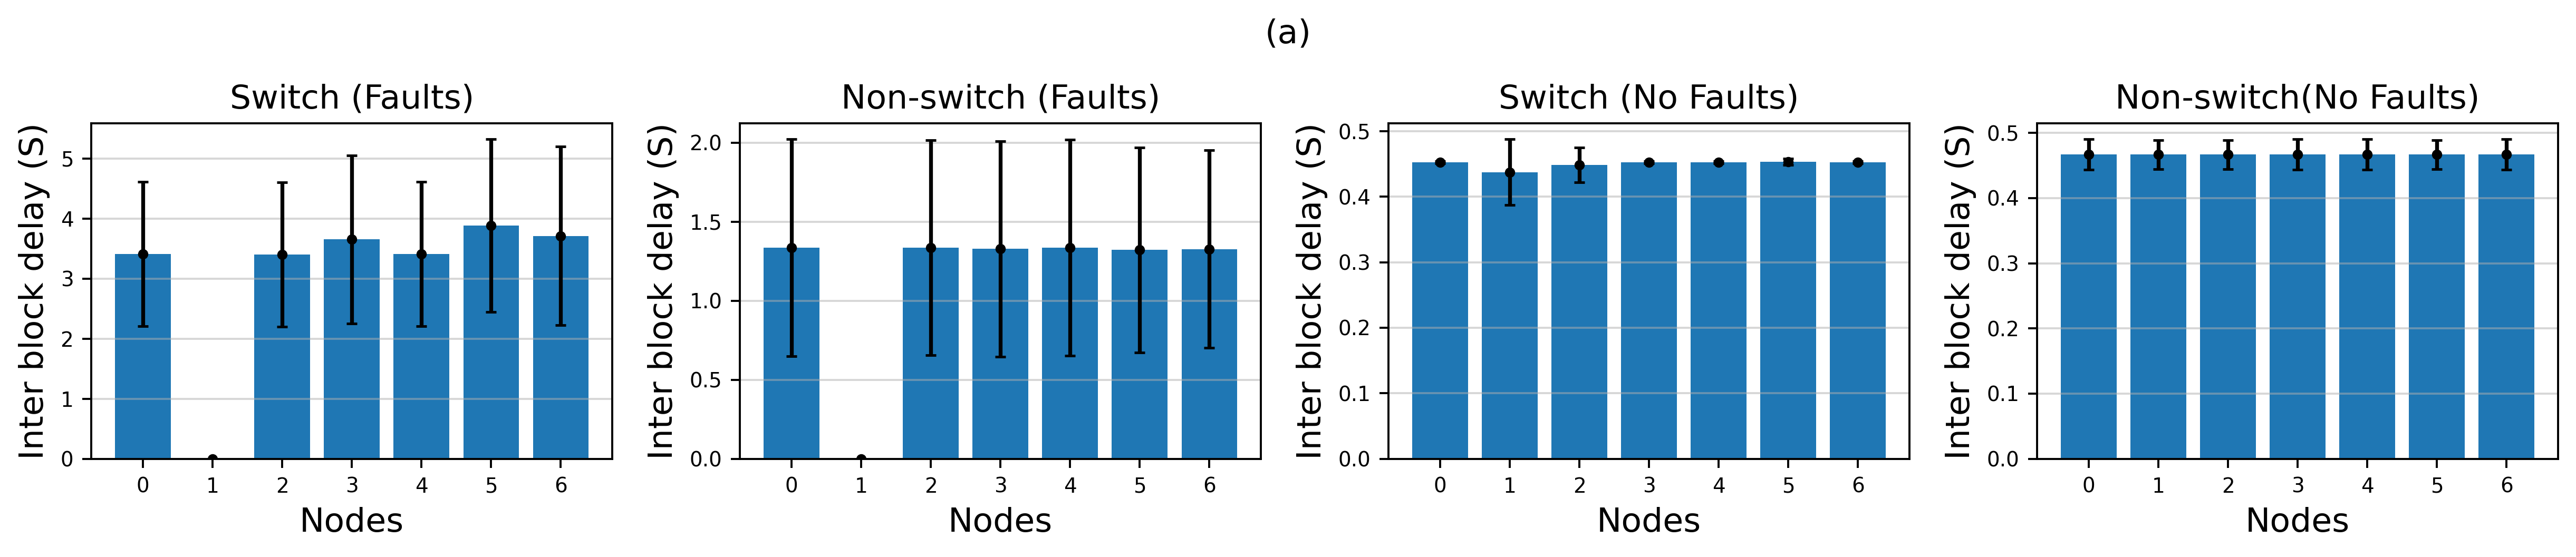

In [ ]:
fig, axes = plt.subplots(1,4)

fig.set_figwidth(14)
fig.set_figheight(3)
fig.set_dpi(350)

fontsize = 13
matplotlib.rcParams['font.size'] = 8

ax = axes[0]

def plot_data(ax, data, x_label, y_label, title):
    # meanprops = {'marker':'x', 'markeredgecolor':'black', 'markersize':4}
    # plot = ax.boxplot(data, showfliers=False, showmeans=False, meanprops=meanprops)
    # for node in faulty_nodes:
    #     plot['boxes'][node].set_color('red')
    # plot['boxes'][node].set_label('faulty')
    
    means = []
    dev = []
    for node in data:
        if node:
            means.append(st.mean(node))
            dev.append(st.stdev(node)/2)
        else:
            means.append(0)
            dev.append(0)
    
    print(dev)
    plot = ax.bar(range(len(data)), means)
    #err = [st.stdev(x) if x else [] for x in data]
    ax.errorbar(range(len(data)), means, yerr=dev, fmt='o', c='black', markersize=3, capsize=2)

    # for node in faulty_nodes:
    #     plot[node].set_color('red')
    # plot[node].set_label('faulty')

    ax.grid(alpha=.5, axis='y')

    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)

    #ax.legend(loc='upper left')

plot_data(axes[0], switch_faults, "Nodes", "Inter block delay (S)", 'Switch (Faults)')
plot_data(axes[1], normal_faults, "Nodes", "Inter block delay (S)", 'Non-switch (Faults)')
plot_data(axes[2], switch_no_faults, "Nodes", "Inter block delay (S)", 'Switch (No Faults)')
plot_data(axes[3], normal_no_faults, "Nodes", "Inter block delay (S)", 'Non-switch(No Faults)')
plt.suptitle('(a)', fontsize=13)
plt.tight_layout()
plt.savefig(f'overhead_static_{extra}.pdf', format='pdf')


In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statistics as st
            
def get_mempool_latency_data(name):
    try:
        path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/mempool_global{name}.json'
        with open(path,'r') as f:
            data = json.load(f)

        global_tx, global_latency = [], []
        for key, d in data.items():
            global_tx.append(d['tx_timestamps'])
            global_latency.append(d['avg_latency'])
    except:
        print('global not found!')
        global_tx, global_latency = [], []

    try:
        path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/mempool_local{name}.json'
        with open(path,'r') as f:
            data = json.load(f)

        local_tx, local_latency = [], []
        for key, d in data.items():
            local_tx.append(d['tx_timestamps'])
            local_latency.append(d['avg_latency'])
    except:
        print('local not found!', name)
        local_tx, local_latency = [], []
    
    try:
        path = f'/Users/georgediamantopoulos/Desktop/PhD/Simulator/SymBChainSim/src/Results/mempool_global+{name}.json'
        with open(path,'r') as f:
            data = json.load(f)

        global_latency_plus = []
        for key, d in data.items():
            global_latency_plus.append(d['avg_latency'])
    except:
        print('global plus not found!')
        global_latency_plus = []

    return global_tx, global_latency, local_tx, local_latency, global_latency_plus

In [ ]:
name =  'test'
global_tx, global_latency, local_tx, local_latency, global_latency_plus = get_mempool_latency_data('_'+name)

global_latency = np.array(global_latency)
local_latency = np.array(local_latency)
global_latency_plus = np.array(global_latency_plus)


global not found!
local not found! _test
global plus not found!


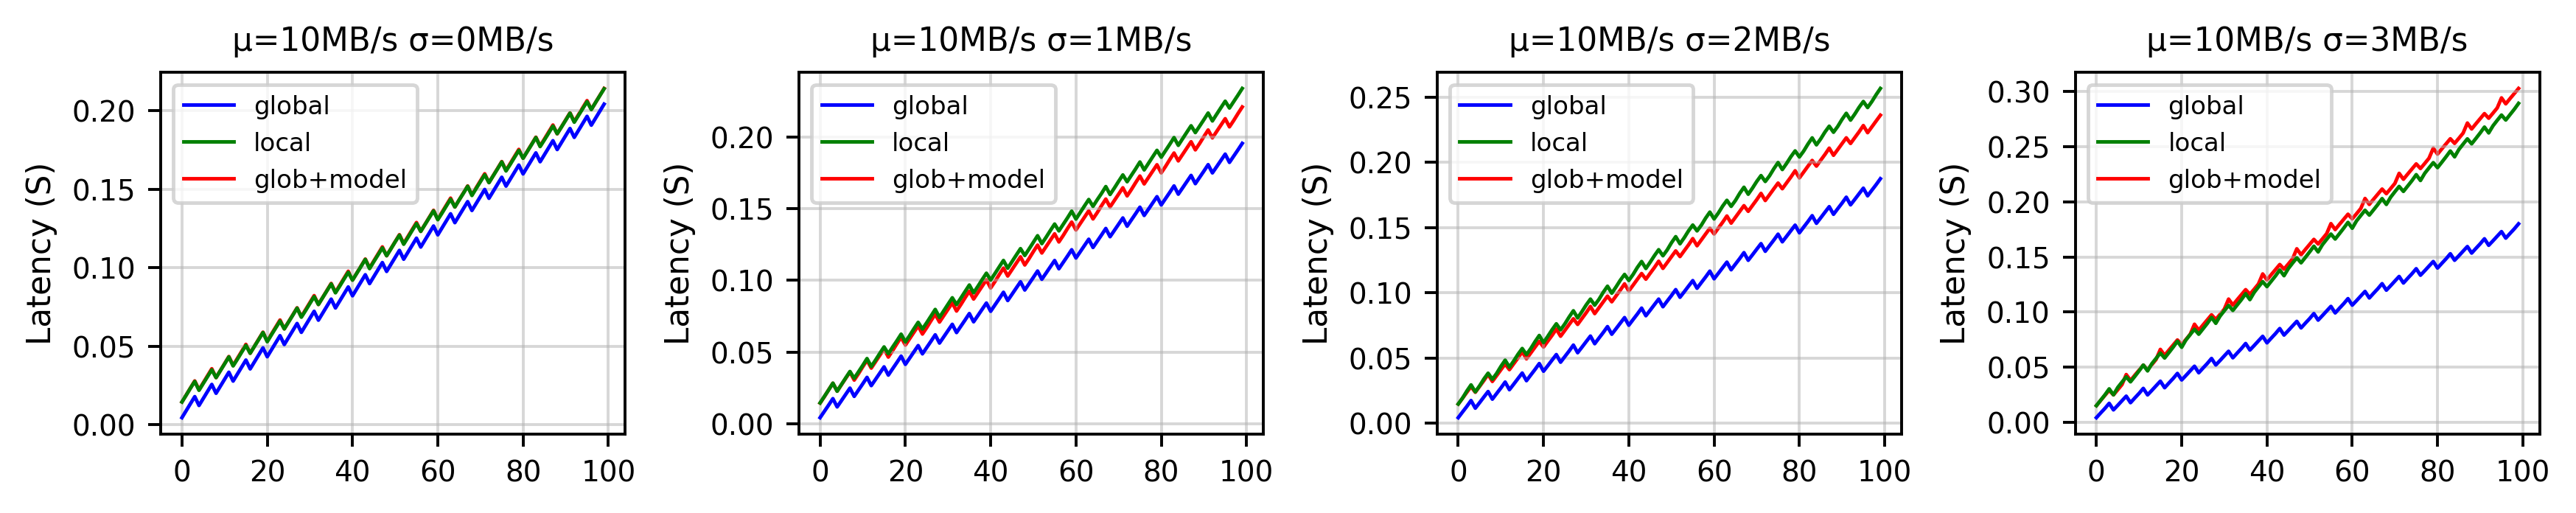

In [ ]:
def plot_latency(ax, name, title):
    global_tx, global_latency, local_tx, local_latency, global_latency_plus = get_mempool_latency_data('_'+name)

    global_latency = np.array(global_latency)
    local_latency = np.array(local_latency)
    global_latency_plus = np.array(global_latency_plus)

    ax.plot(np.mean(global_latency, axis=0), '-b', linewidth=1, markersize=2, label='global',zorder=2)
    ax.plot(np.mean(local_latency, axis=0), '-g', linewidth=1,  markersize=2, label='local', zorder=3)
    ax.plot(np.mean(global_latency_plus, axis=0), '-r', linewidth=1,  markersize=2, label='glob+model', zorder=0)
    ax.grid(alpha=.5)
    ax.legend(ncol=1)

    #ax.set_xlabel('Block',fontsize=fontsize)
    ax.set_ylabel('Latency (S)',fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    # data = [np.mean(global_latency), np.mean(local_latency), np.mean(global_latency_plus)]
    # error = [np.std(global_latency), np.std(local_latency), np.std(global_latency_plus)]
    # labels=['global', 'local', 'global+']
    # xs = [1,2,3]
    # ax.bar(xs, data, zorder=2)
    # #ax.errorbar(xs, data, yerr=error, fmt='o', c='black', markersize=3, capsize=2)

    # ax.set_xticks(ticks=xs, labels=labels)
    # ax.grid(alpha=.5)
    # #ax.legend(ncol=3)

fig, axes = plt.subplots(1,4)

fig.set_figwidth(10)
fig.set_figheight(2)
fig.set_dpi(350)

fontsize = 9
matplotlib.rcParams['font.size'] = 7

plot_latency(axes[0], 'dev0', title='μ=10MB/s σ=0MB/s')
plot_latency(axes[1], 'dev1', title='μ=10MB/s σ=1MB/s')
plot_latency(axes[2], 'dev2', title='μ=10MB/s σ=2MB/s')
plot_latency(axes[3], 'dev3', title='μ=10MB/s σ=3MB/s')
plt.tight_layout()
plt.savefig('Figures/mempool_results.pdf', format='pdf')